Plotting F_lift and F_drag wrt Time. Each time interval must be one leg cycle from the telemetry data.

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd
import numpy as np
import utils
from matplotlib.pyplot import Axes
import math
sns.set_style("whitegrid")
# sns.set_style("ticks",{'axes.grid' : False, 'grid.linestyle': '--', 'grid.color':'black'})
sns.set_palette("bright")


In [10]:
CALIBRATION_FILE = './calibration/out/C.mat'
DATA_FILE = './experiment_data/blue_feet/4/2016.10.08_20.45.13_trial_imudata.txt'

In [11]:
utils.print_header(DATA_FILE)

%  Data file recorded 2016/10/8  20:45:13
%  Stride Frequency         = [1, 1]
%  Lead In /Lead Out        = 
%  Deltas (Fractional)      = [0.25, 0.25, 0.25],[0.25, 0.25, 0.25]
%  Phase                    = 32768
%  Experiment.py 
%  Motor Gains    = [5000, 400, 200, 0, 300, 5000, 400, 200, 0, 300]



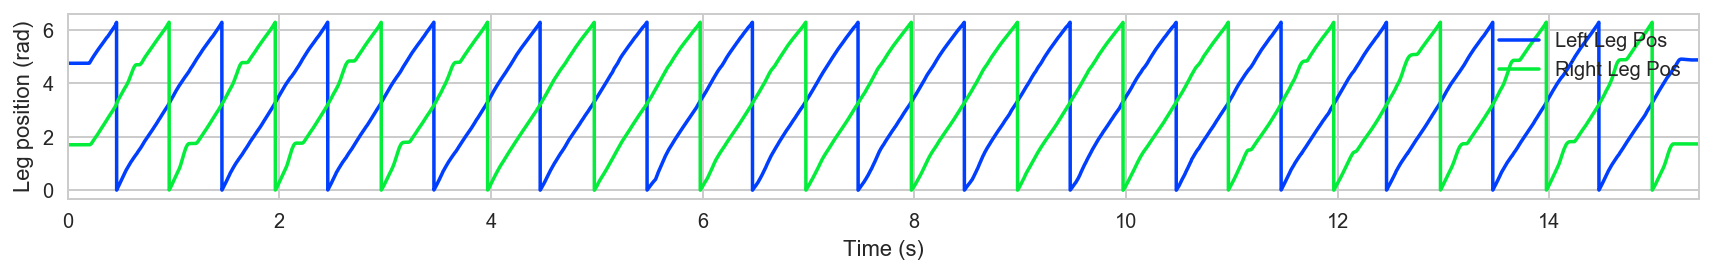

In [12]:
df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)
utils.plot_columns(df, [['Left Leg Pos', 'Right Leg Pos'],], display=True, save_figure=False)

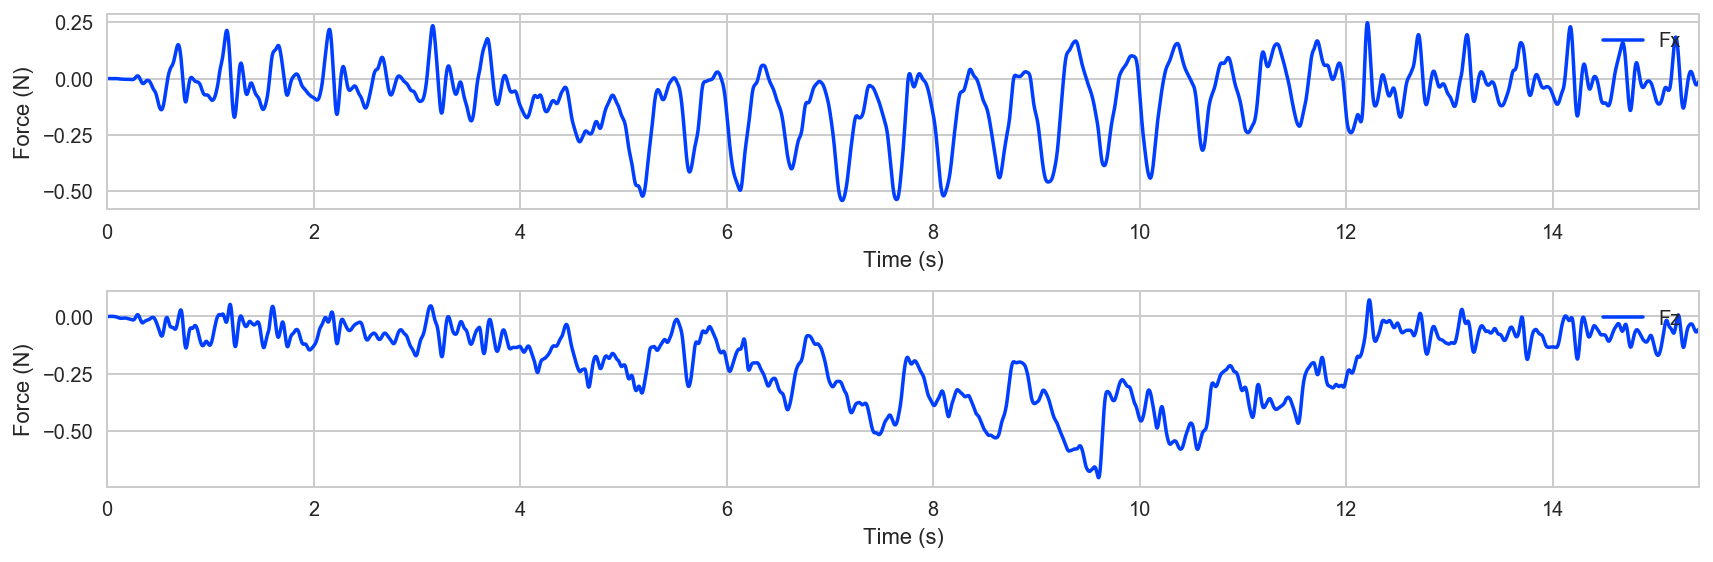

In [13]:
# Drag and Lift Forces
utils.plot_columns(df, ['Fx','Fz'], display=True, save_figure=False)

In [14]:
# print df["Right Leg Pos"].shape
# print str(max(df["Right Leg Pos"])) + " radians."
# print str(min(df["Right Leg Pos"])) + " radians."
# print "starts from: " + str(df["Right Leg Pos"][0]) + " radians."
# print "ends at: " + str(df["Right Leg Pos"][len(df["Right Leg Pos"])-1]) + " radians."
# print np.argmax(df["Right Leg Pos"][3963:])
# print df["Right Leg Pos"][3962]
# print df["Right Leg Pos"][13952]
# print
# print
# print df["Fx"].shape
# # print df["Fx"]

print np.argmax(df["Right Leg Pos"][0:1700])
print np.argmax(df["Right Leg Pos"][1700: 2500])
print df["Right Leg Pos"][957]
print df["Right Leg Pos"][1959]
# max_pos_intervals = {}
# i = 0
# for time in xrange(len(df["Right Leg Pos"])):
#     pos = df["Right Leg Pos"][time]
#     if pos not in max_pos_intervals:
#         max_pos_intervals[pos] = []
#     max_pos_intervals[pos].append(time)

# print max_pos_intervals


957
1959
6.2828018616
6.27973394962


### Figure

Plot the following:
* Leg position vs Time
* F_drag vs Time
* F_lift vs Time

In [46]:
def plot_force_v_position(df):
    fig = plt.figure()
    ax = fig.add_subplot(2,1,1)
    forces = df["Fx"]
    leg_positions = df["Right Leg Pos"]
    ax.plot(leg_positions, forces)
    ax.set_xlabel("Position(radians)")
    ax.set_ylabel("Drag Force(N)")
    plt.show()

def plot_forces_and_positions_interval(df, interval):
    forces = df["Fx"][interval[0]:interval[1]+1]
#     leg_positions = df["Right Leg Pos"][interval[0]: interval[1]+1]
    leg_positions = np.linspace(0, 2*math.pi, len(forces)) - math.pi
    plot_force_v_position_interval_helper(forces, leg_positions)
    
def plot_force_v_position_interval_helper(forces, leg_positions):
    fig = plt.figure()
    ax = fig.add_subplot(2,1,1)
    ax.plot(leg_positions, forces)
    ax.set_xlabel("Position(radians)")
    ax.set_ylabel("Drag Force(N)")
#     ax.set_xticklabels([r"$0$", r"$0$",
#                      r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$",r"$2\pi$",r"$2\pi$"])
    plt.show()

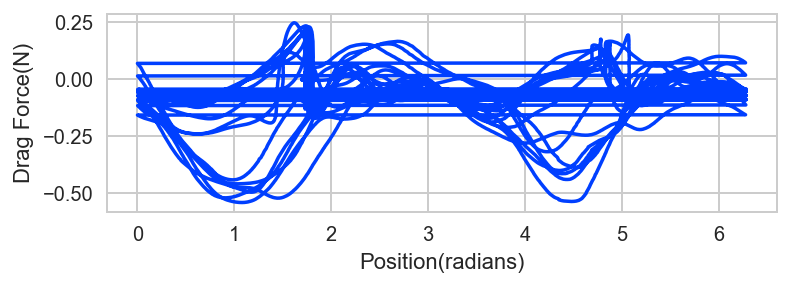

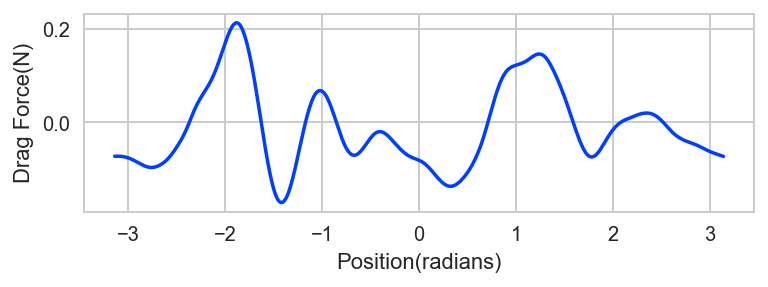

In [47]:
plot_force_v_position(df)
plot_forces_and_positions_interval(df, (957, 1959))

#### Meeting Notes

* For cycles in the leg are the cycles the same ?
* Get it inside the steady state.
* Tricky part is that position is quantized. Parse it in between the steps.
* Plots should be Force vs Leg Position.
* Ron's code that might be useful is located inside his github repo : telemetry/blob/telem_turn/telem_turn.py

* -pi to pi time chunks might be more useful.
* 
